In [1]:
%%capture
cd ..

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils.unicode_utils import *
from utils.complexity_metrics import *
from utils.make_dfu import *
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter


In [3]:
dfu = make_dfu()

Deleting 815 rows where script was not found. On inspection, these characters are not linguistic.

Scripts with no available fonts:
SIGNWRITING            672
KHITAN SMALL SCRIPT    471
LINEAR A               341
CYPRO-MINOAN            99
KAWI                    87
SOGDIAN                 82
MASARAM GONDI           75
INDIC SIYAQ             68
NANDINAGARI             64
GUNJALA GONDI           63
OTTOMAN SIYAQ           61
DOGRA                   60
WANCHO                  59
HATRAN                  26
MAKASAR                 25
KATAKANA                24
ELYMAIC                 23
BOPOMOFO                10
HIRAGANA                 7
Name: script, dtype: int64

Scripts for codes with no matching fonts:
CUNEIFORM           1234
CJK                  624
NUSHU                397
MIAO                 140
TAI THAM             127
HANGUL               117
OLD HUNGARIAN        108
SIDDHAM               94
GEORGIAN              91
MEDEFAIDRIN           91
TANGSA                89
ZANABAZAR 

  0%|          | 0/23218 [00:00<?, ?it/s]

character didn't fit: ⸻ character didn't fit: 𑌐 character didn't fit: 𑍌 Checking whether pictures are boxes


  0%|          | 0/23218 [00:00<?, ?it/s]

Found 4286 boxes
Final df has 18932 characters from 102 different scripts.


In [4]:
#dfu=df_unicode[df_unicode.code.apply(code_type)=='Writing Symbol'].reset_index(drop=True)
#dfu['language'] = dfu.note.apply(get_language)
#dfu.language.value_counts()            

In [5]:
#for i in dfu.language.value_counts().index:
    #print(i)
    #print(' '.join([u(k) for k in dfu[dfu.language==i].code]))

In [6]:
#' '.join(dfu[dfu.language=='MYANMAR'].rep)


In [7]:
%%time

#this code prints the symmetry ratios(left-to-right, top-to-bottom) for the first 100 characters in the dfu df, and the 100th character's pic

sub_df = dfu.head(100).copy()
sub_df['picture'] = sub_df.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))

symmetry = sub_df.picture.apply(check_symmetry)
print(symmetry)




0     (0.9546919215686275, 0.9684819137254902)
1     (0.9405768470588235, 0.9634589176470588)
2     (0.9621153254901961, 0.9690226196078431)
3     (0.9449019921568628, 0.9672999215686274)
4     (0.9565430588235294, 0.9720421019607843)
                        ...                   
95    (0.9801751529411765, 0.9908173490196078)
96     (0.980140894117647, 0.9899243607843137)
97    (0.9775733647058824, 0.9870771764705882)
98    (0.9804592941176471, 0.9852417254901961)
99    (0.9494386509803922, 0.9592847372549019)
Name: picture, Length: 100, dtype: object
CPU times: user 618 ms, sys: 69.8 ms, total: 688 ms
Wall time: 711 ms


In [8]:
sub_df['pixel_count_complexity'] = sub_df.picture.apply(pixel_count_complexity)

'   '.join(sub_df.sort_values('pixel_count_complexity', ascending=True).rep.iloc[:100].values)

'M   W   Ø   Æ   Ñ   æ   Õ   Ô   Q   Ð   Ö   Ó   Ò   B   N   m   O   D   g   Ã   Û   ß   w   Â   Å   G   R   Ê   Ü   Ú   Ù   ð   H   Ä   Á   À   p   Ë   É   È   q   d   b   ã   ê   å   K   â   U   A   Ç   ë   é   è   E   P   Þ   ä   á   à   Z   h   X   S   V   k   e   y   a   Ý   C   o   u   F   n   Î   ç   Y   Ï   Í   Ì   T   x   s   v   f   J   z   L   I   j   c   t   î   l   r   ï   í   ì   i'

In [9]:
%%time
#this code checks the symmetry ratios for the whole dataframe, and prints the picture of the 2280th character in the df

dfu['picture'] = dfu.code.apply(lambda x: make_picture(x, 'data/ttfs/NotoSans-Regular.ttf'))


symmetry = dfu.picture.apply(check_symmetry)
print(symmetry)



0        (0.9546919215686275, 0.9684819137254902)
1        (0.9405768470588235, 0.9634589176470588)
2        (0.9621153254901961, 0.9690226196078431)
3        (0.9449019921568628, 0.9672999215686274)
4        (0.9565430588235294, 0.9720421019607843)
                           ...                   
18927             (0.9665952, 0.9841628862745098)
18928             (0.9665952, 0.9841628862745098)
18929             (0.9665952, 0.9841628862745098)
18930             (0.9665952, 0.9841628862745098)
18931             (0.9665952, 0.9841628862745098)
Name: picture, Length: 18932, dtype: object
CPU times: user 1min 56s, sys: 17.6 s, total: 2min 13s
Wall time: 2min 26s


In [10]:

dfu['pixel_count_complexity'] = dfu.picture.apply(pixel_count_complexity)

'   '.join(dfu.sort_values('pixel_count_complexity',ascending=True).rep.iloc[:100].values)


'Ԫ   Ꙭ   ℻   Ǆ   Ꚗ   Ꝏ   Ꚙ   Ǳ   Ꚅ   Ѭ   ‱   ǅ   Ꟃ   Ѹ   Ꜵ   ॵ   Ꜳ   ʥ   औ   ꟿ   ʤ   ԫ   Ǌ   ऑ   ǋ   ऒ   ǆ   ‰   Ԭ   ᵺ   ǲ   Ѽ   Щ   ꭦ   ओ   Ŵ   Ꝡ   Ӎ   Ꙝ   Ꙧ   Ѿ   Ƣ   Ԣ   Ɱ   Ѩ   ﬄ   Ҧ   ꚗ   ॠ   Ḿ   Ẅ   Ẃ   Ю   Ẁ   Ꙕ   Ꚛ   ॴ   ₯   ꭁ   Ṃ   Ṁ   Ẉ   Ẇ   ख़   Ԡ   Ǿ   ʣ   Ꜽ   Ш   ℔   №   ǳ   ⁂   ﬃ   Ǣ   ᾮ   ᾯ   ѹ   Ꙣ   Ԙ   Ꜩ   Ӂ   Ꝙ   Ҋ   Œ   Ɯ   ꙭ   Ǽ   ₪   Μ   М   M   ꟽ   Ԝ   W   आ   Ⱳ   ȹ   ख   ʩ'

In [11]:
"""
validates the accuracy of the stored distance transform values for each character in the dataframe.
"""


#generate subset dataframes in batches of 100
#num_rows = len(dfu)
#batch_size = 100

#for i in range(0, num_rows, batch_size):
    #sub_dfu = dfu[i:i+batch_size].copy()

    # add distance_transform col to sub_dfu dataframe
    #sub_dfu['distance_transform'] = sub_dfu.picture.apply(distance_transform_edt)

    #for index, row in sub_dfu.iterrows():
        #character = row['picture']
        #distance_transform = row['distance_transform']

        #calculate the distance transform separately
        #calculated_distance_transform = distance_transform_edt(character)

        #compare the calculated distance transform with the stored values
        #if np.array_equal(distance_transform, calculated_distance_transform):
            #print(f"Distance transform values match for character {row['code']}")
        #else:
            #print(f"Distance transform values don't match for character {row['code']}")
    
    #print(sub_dfu[['code', 'picture', 'distance_transform']].head(100))

    # Save the output to CSV
    #sub_dfu[['code', 'picture', 'distance_transform']].to_csv(f'distance_transform_output_{i}.csv', index=False)


'\nvalidates the accuracy of the stored distance transform values for each character in the dataframe.\n'

In [12]:
"""
quantifies the complexity of each character based on its distance transform values. 
"""


#calculate complexity scores for the entire dfu dataframe
complexity_scores = []

for index, row in dfu.iterrows():
    character = row['picture']
    inverted_character = 1 - character #invert the character to get the background pixels
    distance_transform = distance_transform_edt(inverted_character)

    #normalize distance transform values between 0 and 1
    normalized_dt = (distance_transform - np.min(distance_transform)) / (np.max(distance_transform) - np.min(distance_transform))

    #calculate complexity score (ie, avg of normalized values)
    complexity_score = np.mean(normalized_dt)
    complexity_scores.append(complexity_score)

# assign complexity scores to the df
dfu['complexity_score'] = complexity_scores

print(dfu[['code', 'picture', 'complexity_score']])


/var/folders/7l/msjd1z0s0614rzlvdntzntyc0000gn/T/ipykernel_29975/4091600297.py:15: RuntimeWarning: invalid value encountered in true_divide
  normalized_dt = (distance_transform - np.min(distance_transform)) / (np.max(distance_transform) - np.min(distance_transform))


        code                                            picture  \
0       0041  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
1       0042  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
2       0043  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
3       0044  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
4       0045  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
...      ...                                                ...   
18927  E0076  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18928  E0077  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18929  E0078  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18930  E0079  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
18931  E007A  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   

       complexity_score  
0              0.009922  
1              0.013672  
2              0.009676  
3              0.013586  
4              0.009210  
...                 ...  
18927        

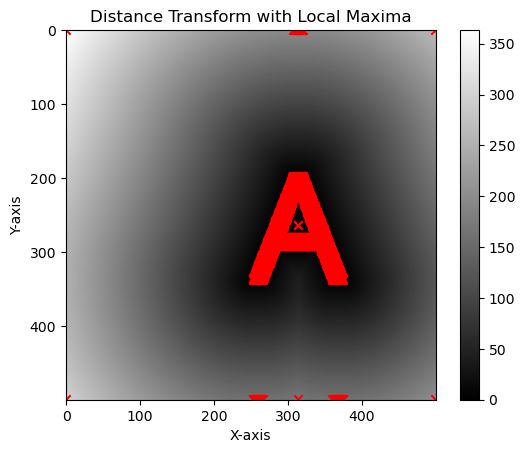

In [13]:

"""
visualizes the distance transform array and overlays the coordinates of local maxima on top of the image
"""

image_index = 0
selected_image = dfu.loc[image_index, 'picture']


#calculate the distance transform of the selected image
distance_transform = distance_transform_edt(selected_image)

#calculate local maxima
footprint = np.ones((3, 3), dtype=bool)
local_maxima = (distance_transform == maximum_filter(distance_transform, footprint=footprint, mode='constant'))

#get coordinates of local maxima
local_maxima_coords = np.argwhere(local_maxima)

#display the distance transform array
plt.imshow(distance_transform, cmap='gray')
plt.colorbar()

#plot the local maxima coordinates on top of the image
x_coords = [coord[1] for coord in local_maxima_coords]
y_coords = [coord[0] for coord in local_maxima_coords]
plt.scatter(x_coords, y_coords, color='red', marker='x')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Distance Transform with Local Maxima')

plt.show()


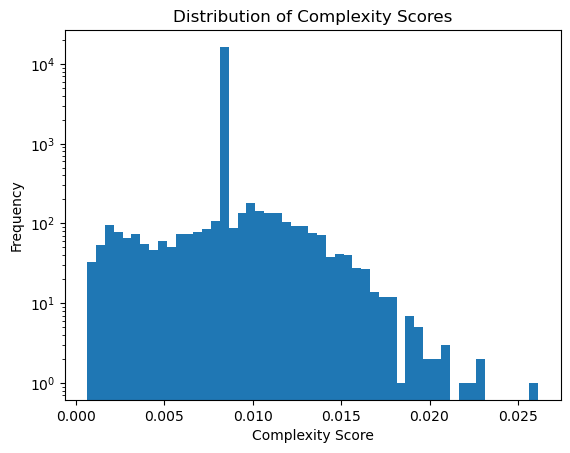

In [14]:
delta = 0.0005
bins = np.arange(np.min(dfu['complexity_score']), np.max(dfu['complexity_score']) + delta, delta)

plt.hist(dfu['complexity_score'], bins=bins)
plt.xlabel('Complexity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Complexity Scores')
plt.yscale('log')

plt.show()
